<a href="https://colab.research.google.com/github/AMLU-ANNA-JOSHY/Support_Vector_Machines/blob/main/SVM_3_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AMLU-ANNA-JOSHY/Support_Vector_Machines/blob/main/notebooks/SVM_3_Regression.ipynb)

# **SVM for Regression**

Support Vector Regression (SVR) applies SVM principles to predict continuous numerical values by finding a hyperplane that fits the best approximation of data points within a defined tolerance margin / insensitive tube (ϵ).

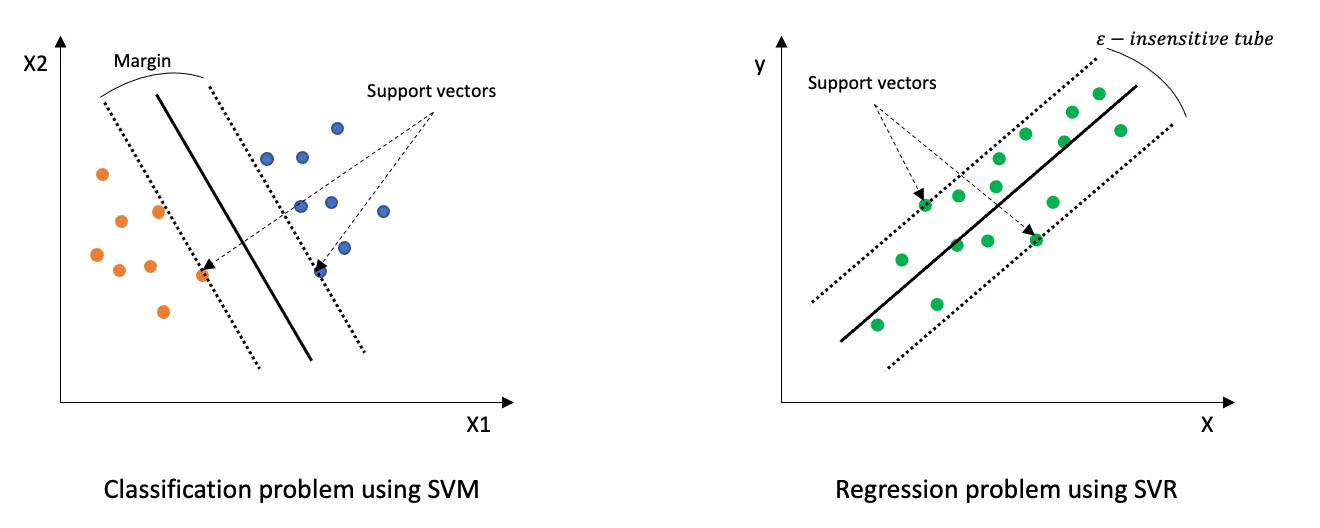

Ref: https://medium.com/@niousha.rf/support-vector-regressor-theory-and-coding-exercise-in-python-ca6a7dfda927

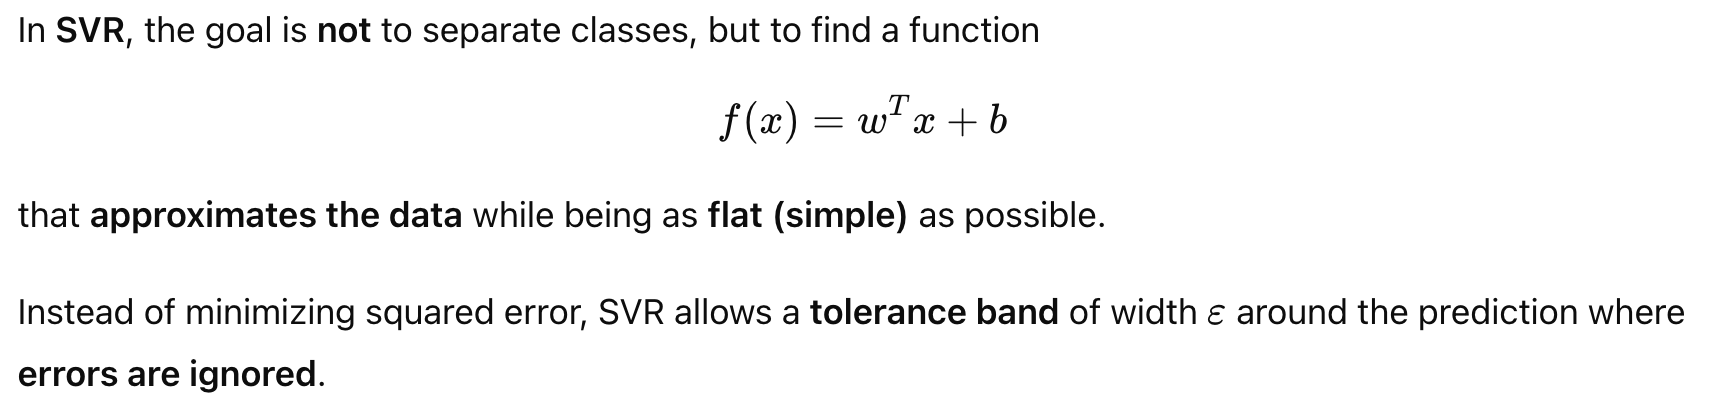

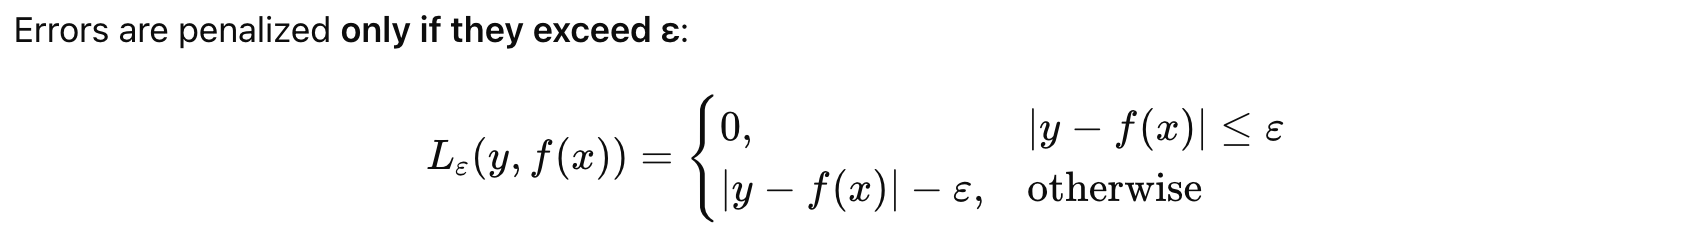

- **Goal:** finding the best line that accurately predicts but avoids overfitting as well.
- The insensitive tube  permits some level of deviation, thus balancing model  complexity and model generalization power.
- **Optimization problem involved:** Find the fitting curve equation  f(x) that is as flat as possible (lowest model complexity avoiding overfitting: keep weights small), while having a maximum deviation of ε (allow misclassifications with no penalty).




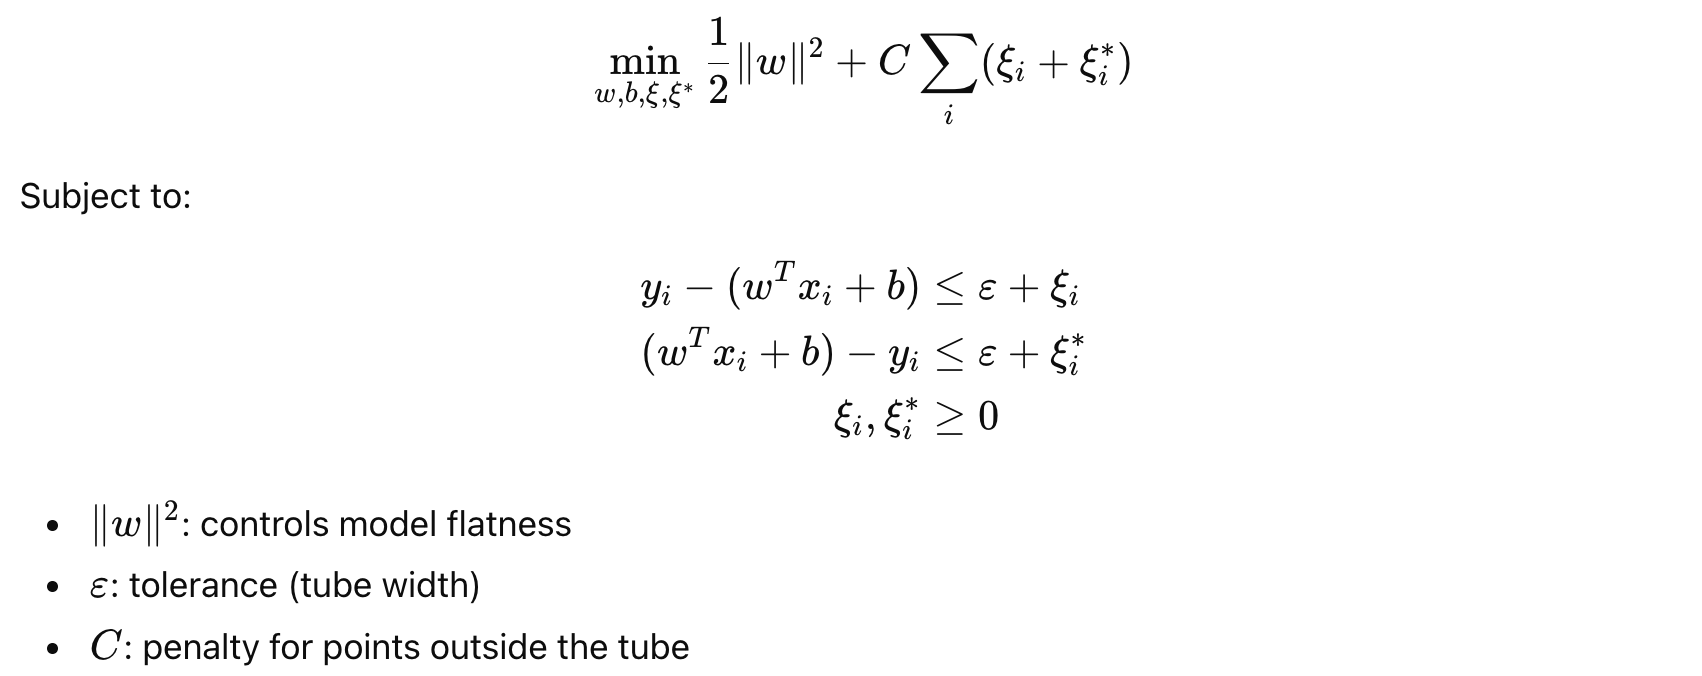

- Penalize large errors beyond the tolerance region using slack variables, thus 'C' controls the trade-off between simplicity and error.
- Only points outside or on the ε-tube influence the model → these are support vectors.
- Points inside the tube have zero loss and don’t affect the solution.
- **We set ε:** Larger ε → fewer support vectors, more bias
- Smaller ε → tighter fit, more sensitivity to data

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
X, y = fetch_california_housing(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Pipeline: scaling + SVR
svr_model = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR(kernel="rbf", C=100, epsilon=0.1, gamma="scale"))
])

# Train
svr_model.fit(X_train, y_train)

In [ ]:
# Predict
y_pred = svr_model.predict(X_test)

# Evaluation
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MSE: 0.32010260562063747
R²: 0.7557231284767714


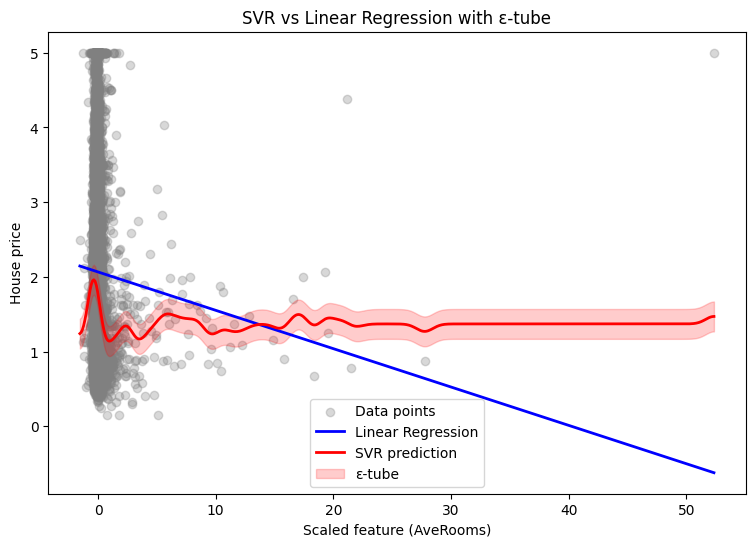

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Load data
X, y = fetch_california_housing(return_X_y=True)

# Train-test split
X, X_test, y, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42
)

# Use ONE feature (e.g., AveRooms)
X = X[:, 3].reshape(-1, 1)

# Scale feature (important for SVR)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Models
svr = SVR(kernel="rbf", C=0.10, epsilon=0.2)
lr = LinearRegression()

# Fit
svr.fit(X_scaled, y)
lr.fit(X_scaled, y)

# Create smooth x-axis
X_plot = np.linspace(X_scaled.min(), X_scaled.max(), 500).reshape(-1, 1)

# Predictions
y_svr = svr.predict(X_plot)
y_lr = lr.predict(X_plot)

# Plot
plt.figure(figsize=(9, 6))
plt.scatter(X_scaled, y, color="gray", alpha=0.3, label="Data points")

plt.plot(X_plot, y_lr, color="blue", linewidth=2, label="Linear Regression")
plt.plot(X_plot, y_svr, color="red", linewidth=2, label="SVR prediction")

# ε-tube
plt.fill_between(
    X_plot.ravel(),
    y_svr - svr.epsilon,
    y_svr + svr.epsilon,
    color="red",
    alpha=0.2,
    label="ε-tube"
)

plt.xlabel("Scaled feature (AveRooms)")
plt.ylabel("House price")
plt.title("SVR vs Linear Regression with ε-tube")
plt.legend()
plt.show()
